In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

1st part: classify MNIST using a simple model.


In [ ]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train = tf.one_hot(y_train, 10)
y_test = tf.one_hot(y_test, 10)
ds_train = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(50)
ds_test = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(50)
print(tf.keras.layers.Flatten(dtype='float32')(x_train))
# Weight Tensor
w = tf.Variable(tf.zeros([784,10], tf.float32))
# Bias Tensor
b = tf.Variable(tf.zeros([10], tf.float32))

tf.Tensor(
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], shape=(60000, 784), dtype=float32)


In [ ]:
def forward(x):
    return tf.matmul(x,w) + b
def activation(x):
    return tf.nn.softmax(forward(x))
def model(x):
    x = tf.keras.layers.Flatten(dtype='float32')(x)
    return activation(x)
def cross_entropy(y, y_pred):
    return -tf.reduce_sum(y * tf.math.log(y_pred + 1.e-10))
cross_entropy(y_train, model(x_train)).numpy()
def step_train(x, y):
    with tf.GradientTape() as tape:
      current_loss = cross_entropy(y, model(x))
      grads = tape.gradient(current_loss, [w, b])
      tf.keras.optimizers.SGD(learning_rate=0.25).apply_gradients(zip(grads, [w, b]))
    return current_loss.numpy()

In [ ]:
loss_values = []
accuracies = []
iter = 10
for i in range(iter):
    j = 0
    for x_train_batch, y_train_batch in ds_train:
        j+=1
        current_loss = step_train(x_train_batch, y_train_batch)
        if j%500==0:
            print("Epoch:", str(i), "Batch:", str(j), "Loss:", str(current_loss) )
    current_loss = cross_entropy( y_train, model( x_train )).numpy()
    loss_values.append(current_loss)
    correct_prediction = tf.equal(tf.argmax(model(x_train), axis=1), tf.argmax(y_train, axis=1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32)).numpy()
    accuracies.append(accuracy)
    print("End of Epoch:", str(i), "Loss:", str(current_loss), "Accuracy:", str(accuracy) )

Epoch: 0 Batch: 500 Loss: 308.78094
Epoch: 0 Batch: 1000 Loss: 243.85347
End of Epoch: 0 Loss: 335063.8 Accuracy: 0.73728335
Epoch: 1 Batch: 500 Loss: 270.43488
Epoch: 1 Batch: 1000 Loss: 239.25098
End of Epoch: 1 Loss: 331978.1 Accuracy: 0.74156666
Epoch: 2 Batch: 500 Loss: 290.95187
Epoch: 2 Batch: 1000 Loss: 253.18973
End of Epoch: 2 Loss: 325348.25 Accuracy: 0.7507667
Epoch: 3 Batch: 500 Loss: 292.71637
Epoch: 3 Batch: 1000 Loss: 260.54138
End of Epoch: 3 Loss: 321318.7 Accuracy: 0.75453335
Epoch: 4 Batch: 500 Loss: 289.2487
Epoch: 4 Batch: 1000 Loss: 242.80728
End of Epoch: 4 Loss: 326882.06 Accuracy: 0.7500833
Epoch: 5 Batch: 500 Loss: 280.16818
Epoch: 5 Batch: 1000 Loss: 230.50214
End of Epoch: 5 Loss: 321615.75 Accuracy: 0.75516665
Epoch: 6 Batch: 500 Loss: 277.45898
Epoch: 6 Batch: 1000 Loss: 230.25873
End of Epoch: 6 Loss: 318383.2 Accuracy: 0.7596667
Epoch: 7 Batch: 500 Loss: 296.34238
Epoch: 7 Batch: 1000 Loss: 230.25853
End of Epoch: 7 Loss: 317834.22 Accuracy: 0.7604667
E

In [ ]:
correct_prediction_train = tf.equal(tf.argmax(model(x_train), axis=1),tf.argmax(y_train,axis=1))
accuracy_train = tf.reduce_mean(tf.cast(correct_prediction_train, tf.float32)).numpy()
correct_prediction_test = tf.equal(tf.argmax(model(x_test), axis=1),tf.argmax(y_test, axis=1))
accuracy_test = tf.reduce_mean(tf.cast(correct_prediction_test, tf.float32)).numpy()
print("Training Accuracy=>", accuracy_train)
print("Test Accuracy=>", accuracy_test)

Training Accuracy=> 0.7582833
Test Accuracy=> 0.7536


Text(0, 0.5, 'Loss')

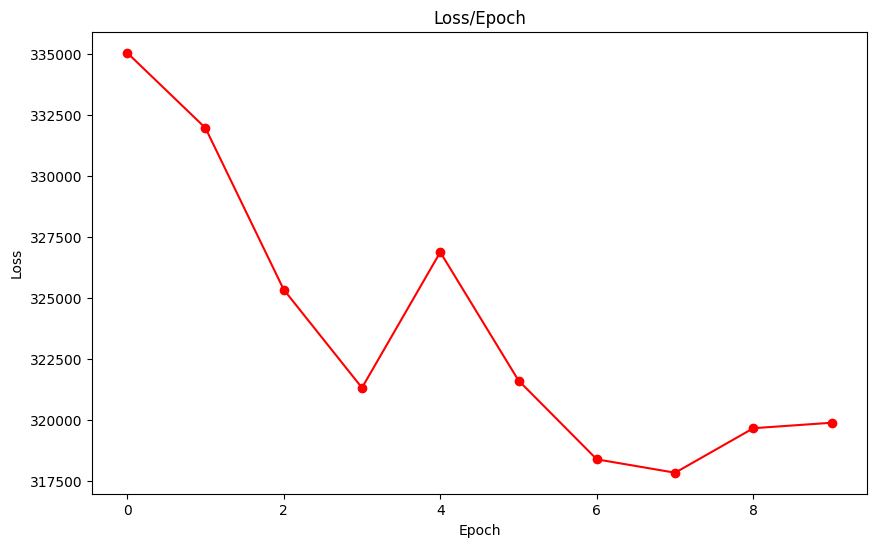

In [ ]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)
#print(loss_values)
plt.plot(loss_values,'-ro')
plt.title("Loss/Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")

Text(0, 0.5, 'Accuracy')

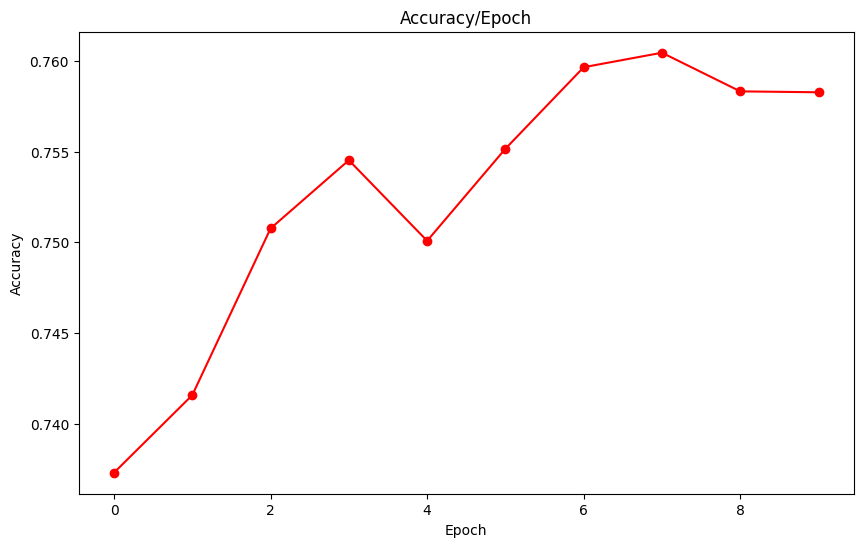

In [ ]:
plt.plot(accuracies,'-ro')
plt.title("Accuracy/Epoch")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")

2nd part: Deep Learning applied on MNIST via CNN.

In [ ]:
width = 28
height = 28
flat = width*height
class_output = 10
ITrain = tf.reshape(x_train, [-1,28,28,1])
ITrain = tf.cast(ITrain, 'float32')
ITest = tf.reshape(x_test, [-1,28,28,1])
ITest = tf.cast(ITest, 'float32')
ds2_train = tf.data.Dataset.from_tensor_slices((ITrain, y_train)).batch(50)
ds2_test = tf.data.Dataset.from_tensor_slices((ITest, y_test)).batch(50)
ITrain = tf.slice(ITrain,[0,0,0,0],[10000,28,28,1])
y_train = tf.slice(y_train,[0,0],[10000,10])

In [ ]:
W_conv1 = tf.Variable(tf.random.truncated_normal([5, 5, 1, 32], stddev=0.1, seed=0))
b_conv1 = tf.Variable(tf.constant(0.1, shape=[32]))
W_conv2 = tf.Variable(tf.random.truncated_normal([5, 5, 32, 64], stddev=0.1, seed=1))
b_conv2 = tf.Variable(tf.constant(0.1, shape=[64]))
W_fc1 = tf.Variable(tf.random.truncated_normal([7 * 7 * 64, 1024], stddev=0.1, seed = 2))
b_fc1 = tf.Variable(tf.constant(0.1, shape=[1024]))
W_fc2 = tf.Variable(tf.random.truncated_normal([1024, 10], stddev=0.1, seed = 2))
b_fc2 = tf.Variable(tf.constant(0.1, shape=[10]))
variables = [W_conv1, b_conv1, W_conv2, b_conv2, W_fc1, b_fc1, W_fc2, b_fc2,]

In [ ]:
def convolve1(x):
    return tf.nn.conv2d(x, W_conv1, strides=[1, 1, 1, 1], padding='SAME') + b_conv1
def h_conv1(x):
    return tf.nn.relu(convolve1(x))
def conv1(x):
    return tf.nn.max_pool(h_conv1(x), ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
def convolve2(x):
    return tf.nn.conv2d(conv1(x), W_conv2, strides=[1, 1, 1, 1], padding='SAME') + b_conv2
def h_conv2(x):
    return tf.nn.relu(convolve2(x))
def conv2(x):
    return tf.nn.max_pool(h_conv2(x), ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
def layer2_matrix(x):
    return tf.reshape(conv2(x), [-1, 7 * 7 * 64])
def fcl(x):
    return tf.matmul(layer2_matrix(x), W_fc1) + b_fc1
def h_fc1(x):
    return tf.nn.relu(fcl(x))
def layer_drop(x):
    return tf.nn.dropout(h_fc1(x), 0.5)
def fc(x):
    return tf.matmul(layer_drop(x), W_fc2) + b_fc2
def y_CNN(x):
    return tf.nn.softmax(fc(x))
def train_step(x, y):
    with tf.GradientTape() as tape:
        current_loss = cross_entropy(y, y_CNN(x))
        grads = tape.gradient(current_loss, variables)
        tf.keras.optimizers.Adam(1e-4).apply_gradients(zip(grads, variables))
        return current_loss.numpy()
correct_prediction = tf.equal(tf.argmax(y_CNN(ITrain), axis=1), tf.argmax(y_train, axis=1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, 'float32'))

In [ ]:
loss_values = []
accuracies = []
iter = 1
for i in range(iter):
    j = 0
    for x_train_batch, y_train_batch in ds2_train:
        j += 1
        current_loss = train_step(x_train_batch, y_train_batch)
        if j%50 == 0:
            correct_prediction = tf.equal(tf.argmax(y_CNN(x_train_batch), axis=1), tf.argmax(y_train_batch, axis=1))
            accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32)).numpy()
            print("Epoch:", str(i), "Batch:", str(j), "Loss:", str(current_loss), "accuracy", str(accuracy))
    current_loss = cross_entropy( y_train, y_CNN(ITrain)).numpy()
    loss_values.append(current_loss)
    correct_prediction = tf.equal(tf.argmax(y_CNN(ITrain), axis=1), tf.argmax(y_train, axis=1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32)).numpy()
    accuracies.append(accuracy)
    print("End of Epoch:", str(i), "Loss:", str(current_loss), "Accuracy:", str(accuracy) )

Epoch: 0 Batch: 50 Loss: 128.1001 accuracy 0.48
Epoch: 0 Batch: 100 Loss: 66.02341 accuracy 0.74
Epoch: 0 Batch: 150 Loss: 47.956406 accuracy 0.8
Epoch: 0 Batch: 200 Loss: 17.28878 accuracy 0.88
Epoch: 0 Batch: 250 Loss: 36.471428 accuracy 0.8
Epoch: 0 Batch: 300 Loss: 18.361963 accuracy 0.88
Epoch: 0 Batch: 350 Loss: 33.07878 accuracy 0.82
Epoch: 0 Batch: 400 Loss: 12.007488 accuracy 0.86
Epoch: 0 Batch: 450 Loss: 40.3334 accuracy 0.88
Epoch: 0 Batch: 500 Loss: 13.150215 accuracy 0.88
Epoch: 0 Batch: 550 Loss: 15.366376 accuracy 0.94
Epoch: 0 Batch: 600 Loss: 23.63818 accuracy 0.86
Epoch: 0 Batch: 650 Loss: 32.503277 accuracy 0.86
Epoch: 0 Batch: 700 Loss: 5.925029 accuracy 0.98
Epoch: 0 Batch: 750 Loss: 18.317904 accuracy 0.94
Epoch: 0 Batch: 800 Loss: 13.134552 accuracy 0.88
Epoch: 0 Batch: 850 Loss: 29.685713 accuracy 0.94
Epoch: 0 Batch: 900 Loss: 15.110259 accuracy 0.92
Epoch: 0 Batch: 950 Loss: 21.380749 accuracy 0.92
Epoch: 0 Batch: 1000 Loss: 15.901676 accuracy 0.96
Epoch: 0 B

In [ ]:
j = 0
acccuracies=[]
for x_train_batch, y_train_batch in ds2_train:
        j += 1
        correct_prediction = tf.equal(tf.argmax(y_CNN(x_train_batch), axis=1), tf.argmax(y_train_batch, axis=1))
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32)).numpy()
        if j%100 == 0:
            print("Batch:", str(j), "Accuracy:", str(accuracy) )
print("Accuracy of Entire Set:", str(np.mean(accuracies)))

Batch: 100 Accuracy: 0.94
Batch: 200 Accuracy: 0.98
Batch: 300 Accuracy: 0.92
Batch: 400 Accuracy: 0.96
Batch: 500 Accuracy: 0.92
Batch: 600 Accuracy: 0.9
Batch: 700 Accuracy: 1.0
Batch: 800 Accuracy: 0.94
Batch: 900 Accuracy: 0.88
Batch: 1000 Accuracy: 0.96
Batch: 1100 Accuracy: 0.86
Batch: 1200 Accuracy: 0.98
Accuracy of Entire Set: 0.9281


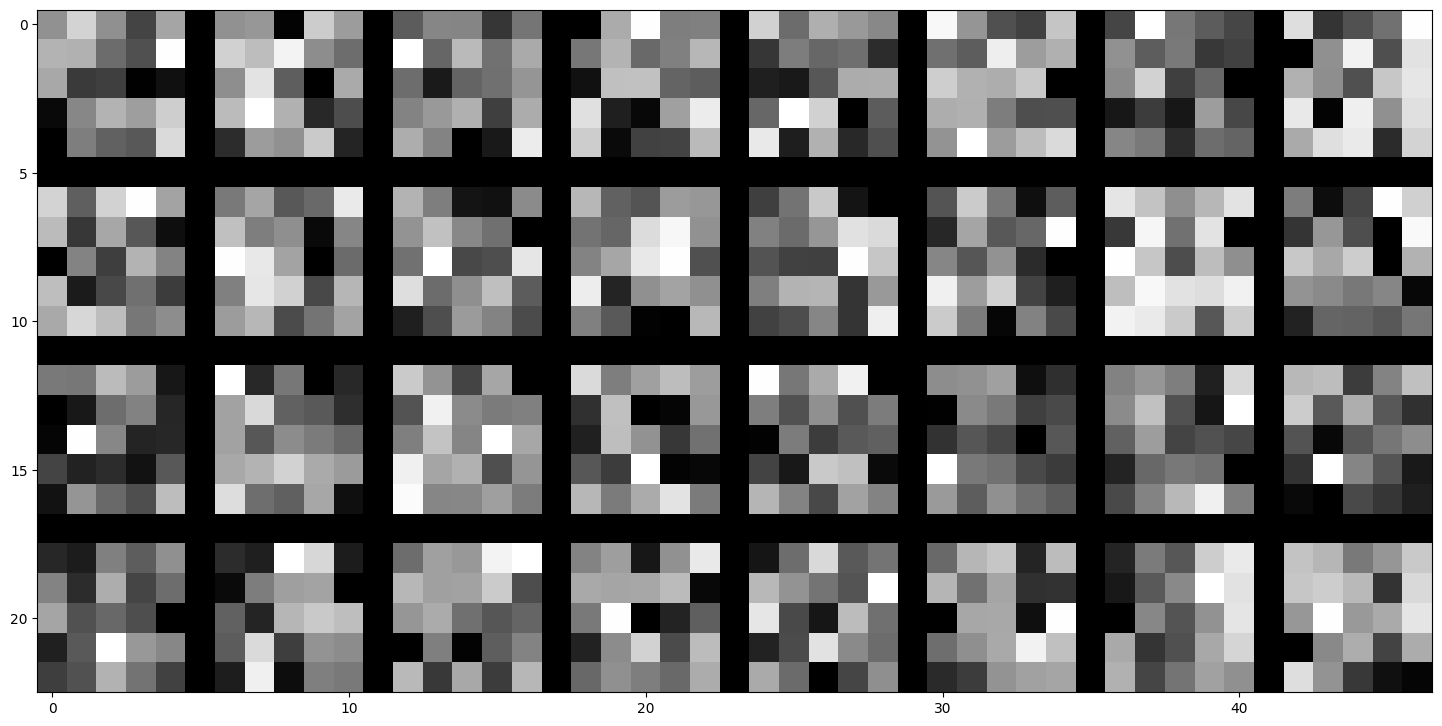

In [ ]:
kernels = tf.reshape(tf.transpose(W_conv1, perm=[2, 3, 0,1]),[32, -1])
#Rename '3) Utils1.py' to 'utils1.py'.
import utils1
import imp
imp.reload(utils1)
from utils1 import tile_raster_images
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline
image = Image.fromarray(tile_raster_images(kernels.numpy(), img_shape=(5, 5) ,tile_shape=(4, 8), tile_spacing=(1, 1)))
plt.rcParams['figure.figsize'] = (18.0, 18.0)
imgplot = plt.imshow(image)
imgplot.set_cmap('gray')

<ipython-input-79-94ce1fadc2de>:9: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  n_rows = np.math.ceil(filters / n_columns) + 1
<ipython-input-79-94ce1fadc2de>:11: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(n_rows, n_columns, i + 1)


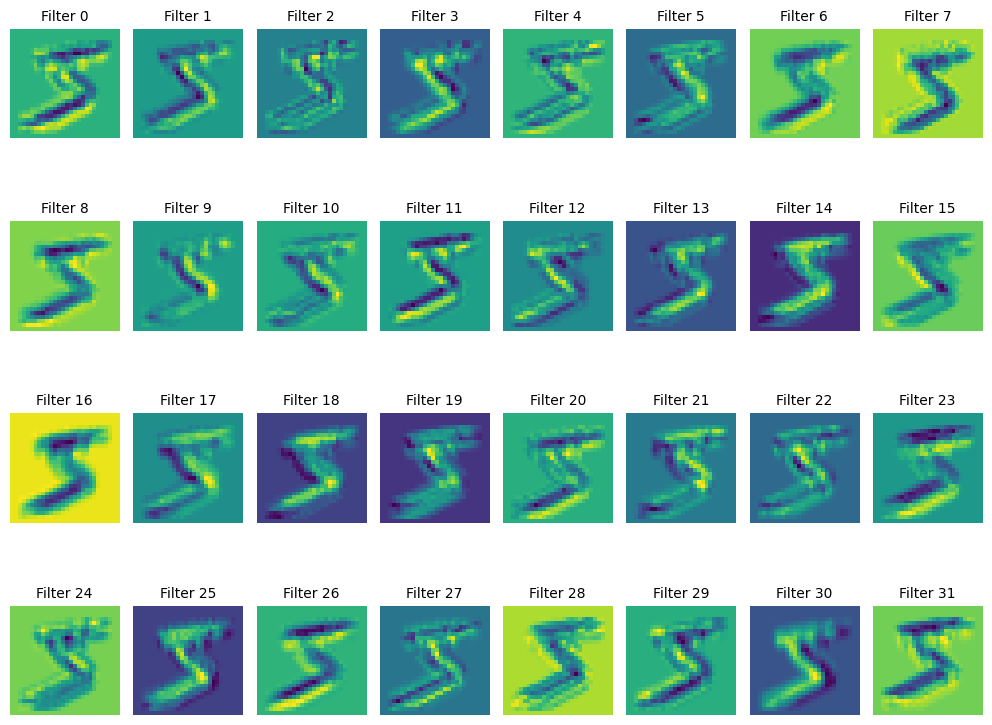

In [ ]:
plt.rcParams['figure.figsize'] = (10, 10)
sampleimage = [ITrain[0]]
plt.imshow(np.reshape(sampleimage, [28,28]), cmap="gray")
sampleimage = np.array(sampleimage)
ActivatedUnits = convolve1(sampleimage)
filters = ActivatedUnits.shape[3]
plt.figure(1, figsize=(16, 8))
n_columns = 8
n_rows = np.math.ceil(filters / n_columns) + 1
for i in range(filters):
    plt.subplot(n_rows, n_columns, i + 1)
    plt.title(f'Filter {i}', fontsize=10)
    plt.imshow(ActivatedUnits[0, :, :, i], interpolation="nearest", cmap="viridis")
    plt.axis('off')
plt.tight_layout(pad=1.0)
plt.show()